# Training experimental models

In [4]:
from dataset.dataset import load_fashion_mnist_dataset

X_train, X_test = load_fashion_mnist_dataset()

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [4]:
flatten_dim = X_train[0].shape[0]

In [8]:
import pickle

from models.metrics import MeanSquaredError
from models.neural_network import Autoencoder
from models.optimizer import Optimizer


def pickle_results(
    dim: int,
    learning_rate: float,
    batch_size: int,
    optimizer: Optimizer,
    autoencoder: Autoencoder,
):
    with open(
        f"saved_models/networks/autoencoder_{dim}_{learning_rate}_{batch_size}", "wb"
    ) as pickle_file:
        pickle.dump(autoencoder, pickle_file)

    with open(
        f"saved_models/optimizers/optimizer_{dim}_{learning_rate}_{batch_size}", "wb"
    ) as pickle_file:
        pickle.dump(optimizer, pickle_file)

In [9]:
code_dims = [12, 36, 108]
learning_rates = [1, 0.9, 0.09]
batch_sizes = [16, 128, 512]

In [10]:
# Code dim

learning_rate = learning_rates[1]
batch_size = batch_sizes[1]

for code_dim in code_dims:
    autoencoder = Autoencoder(
        input_dim=flatten_dim, code_dim=code_dim, encoder_hidden_count=0, reduce_by=1.5
    )
    optimizer = Optimizer(
        autoencoder,
        loss=MeanSquaredError(),
        learning_rate=learning_rate,
        batch_size=batch_size,
        epochs=150,
    )

    optimizer.fit(X_train, X_train)

    pickle_results(code_dim, learning_rate, batch_size, optimizer, autoencoder)

In [ ]:
# Learning rate

code_dim = code_dims[1]
batch_size = batch_sizes[1]

for learning_rate in learning_rates[::2]:
    autoencoder = Autoencoder(
        input_dim=flatten_dim, code_dim=code_dim, encoder_hidden_count=0, reduce_by=1.5
    )
    optimizer = Optimizer(
        autoencoder,
        loss=MeanSquaredError(),
        learning_rate=learning_rate,
        batch_size=batch_size,
        epochs=150,
    )

    optimizer.fit(X_train, X_train)

    pickle_results(code_dim, learning_rate, batch_size, optimizer, autoencoder)

Epoch 0  -- accuracy 0.001 - loss 0.133
Epoch 1  -- accuracy 0.001 - loss 0.091
Epoch 2  -- accuracy 0.001 - loss 0.087
Epoch 3  -- accuracy 0.001 - loss 0.085
Epoch 4  -- accuracy 0.001 - loss 0.082
Epoch 5  -- accuracy 0.002 - loss 0.076
Epoch 6  -- accuracy 0.003 - loss 0.069
Epoch 7  -- accuracy 0.004 - loss 0.063
Epoch 8  -- accuracy 0.004 - loss 0.058
Epoch 9  -- accuracy 0.004 - loss 0.053
Epoch 10  -- accuracy 0.004 - loss 0.050
Epoch 11  -- accuracy 0.004 - loss 0.047
Epoch 12  -- accuracy 0.004 - loss 0.045
Epoch 13  -- accuracy 0.004 - loss 0.044
Epoch 14  -- accuracy 0.005 - loss 0.043
Epoch 15  -- accuracy 0.006 - loss 0.041
Epoch 16  -- accuracy 0.006 - loss 0.040
Epoch 17  -- accuracy 0.007 - loss 0.040
Epoch 18  -- accuracy 0.007 - loss 0.039
Epoch 19  -- accuracy 0.007 - loss 0.038
Epoch 20  -- accuracy 0.007 - loss 0.038
Epoch 21  -- accuracy 0.007 - loss 0.037
Epoch 22  -- accuracy 0.008 - loss 0.037
Epoch 23  -- accuracy 0.008 - loss 0.037
Epoch 24  -- accuracy 0.00

In [ ]:
# Batch size

code_dim = code_dims[1]
learning_rate = learning_rates[1]

for batch_size in batch_sizes[::2]:
    autoencoder = Autoencoder(
        input_dim=flatten_dim, code_dim=code_dim, encoder_hidden_count=0, reduce_by=1.5
    )
    optimizer = Optimizer(
        autoencoder,
        loss=MeanSquaredError(),
        accuracy=Accuracy(),
        learning_rate=learning_rate,
        batch_size=batch_size,
        epochs=150,
    )

    optimizer.fit(X_train, X_train)

    pickle_results(code_dim, learning_rate, batch_size, optimizer, autoencoder)

Epoch 0  -- accuracy 0.001 - loss 0.087
Epoch 1  -- accuracy 0.004 - loss 0.048
Epoch 2  -- accuracy 0.005 - loss 0.039
Epoch 3  -- accuracy 0.008 - loss 0.035
Epoch 4  -- accuracy 0.010 - loss 0.032
Epoch 5  -- accuracy 0.011 - loss 0.030
Epoch 6  -- accuracy 0.012 - loss 0.029
Epoch 7  -- accuracy 0.013 - loss 0.028
Epoch 8  -- accuracy 0.013 - loss 0.027
Epoch 9  -- accuracy 0.012 - loss 0.027
Epoch 10  -- accuracy 0.012 - loss 0.027
Epoch 11  -- accuracy 0.011 - loss 0.027
Epoch 12  -- accuracy 0.011 - loss 0.026
Epoch 13  -- accuracy 0.011 - loss 0.026
Epoch 14  -- accuracy 0.011 - loss 0.026
Epoch 15  -- accuracy 0.011 - loss 0.026
Epoch 16  -- accuracy 0.011 - loss 0.026
Epoch 17  -- accuracy 0.012 - loss 0.026
Epoch 18  -- accuracy 0.012 - loss 0.026
Epoch 19  -- accuracy 0.012 - loss 0.025
Epoch 20  -- accuracy 0.012 - loss 0.025
Epoch 21  -- accuracy 0.011 - loss 0.025
Epoch 22  -- accuracy 0.011 - loss 0.025
Epoch 23  -- accuracy 0.011 - loss 0.025
Epoch 24  -- accuracy 0.01

# Regularisation techniques

## Injecting noise

In [1]:
from dataset.dataset import load_fashion_mnist_dataset

noisy_X_train, X_train = load_fashion_mnist_dataset(noisy=True, noise_level=0.08)

noisy_X_train.shape, X_train.shape

2023-11-12 22:31:26.468998: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 22:31:26.736882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 22:31:26.739034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 22:31:29.199938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


((60000, 784), (60000, 784))

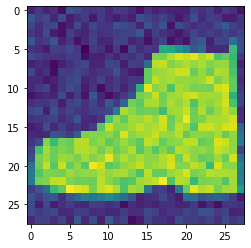

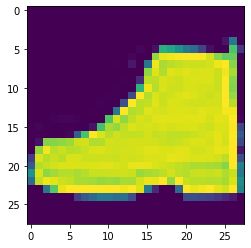

In [2]:
from matplotlib import pyplot as plt
from numpy import random

random_idx = random.randint(0, noisy_X_train.shape[0])

plt.imshow(noisy_X_train[random_idx].reshape(28, 28), interpolation="nearest")
plt.show()

plt.imshow(X_train[random_idx].reshape(28, 28), interpolation="nearest")
plt.show()

In [14]:
import pickle

from models.metrics import MeanSquaredError
from models.neural_network import Autoencoder
from models.optimizer import Optimizer

autoencoder = Autoencoder(
    input_dim=flatten_dim, code_dim=121, encoder_hidden_count=1, reduce_by=1.5
)
optimizer = Optimizer(
    autoencoder,
    loss=MeanSquaredError(),
    learning_rate=0.9,
    batch_size=128,
    epochs=300,
)

optimizer.fit(noisy_X_train, X_train)

path = "saved_models/"
noise_path = "noise/"

with open(f"{path}networks/{noise_path}autoencoder", "wb") as pickle_file:
    pickle.dump(autoencoder, pickle_file)

with open(f"{path}optimizers/{noise_path}optimizer", "wb") as pickle_file:
    pickle.dump(optimizer, pickle_file)

Epoch 0  --  loss 0.067
Epoch 1  --  loss 0.045
Epoch 2  --  loss 0.039
Epoch 3  --  loss 0.034
Epoch 4  --  loss 0.030
Epoch 5  --  loss 0.028
Epoch 6  --  loss 0.027
Epoch 7  --  loss 0.026
Epoch 8  --  loss 0.025
Epoch 9  --  loss 0.025
Epoch 10  --  loss 0.024
Epoch 11  --  loss 0.023
Epoch 12  --  loss 0.023
Epoch 13  --  loss 0.022
Epoch 14  --  loss 0.022
Epoch 15  --  loss 0.022
Epoch 16  --  loss 0.021
Epoch 17  --  loss 0.021
Epoch 18  --  loss 0.020
Epoch 19  --  loss 0.020
Epoch 20  --  loss 0.020
Epoch 21  --  loss 0.019
Epoch 22  --  loss 0.019
Epoch 23  --  loss 0.019
Epoch 24  --  loss 0.019
Epoch 25  --  loss 0.018
Epoch 26  --  loss 0.018
Epoch 27  --  loss 0.018
Epoch 28  --  loss 0.018
Epoch 29  --  loss 0.017
Epoch 30  --  loss 0.017
Epoch 31  --  loss 0.017
Epoch 32  --  loss 0.017
Epoch 33  --  loss 0.017
Epoch 34  --  loss 0.016
Epoch 35  --  loss 0.016
Epoch 36  --  loss 0.016
Epoch 37  --  loss 0.016
Epoch 38  --  loss 0.016
Epoch 39  --  loss 0.016
Epoch 40  

## Early stopping

In [15]:
path = "saved_models/"
early_stopping_path = "early_stopping/"

In [ ]:
import pickle

from models.metrics import MeanSquaredError
from models.neural_network import Autoencoder
from models.optimizer import Optimizer

from dataset.dataset import load_fashion_mnist_dataset

X_train, y_train, X_valid, y_valid = load_fashion_mnist_dataset(y=True)

X_train.shape, y_train.shape

flatten_dim = X_train[0].shape[0]

autoencoder = Autoencoder(
    input_dim=flatten_dim, code_dim=121, encoder_hidden_count=1, reduce_by=1.5
)
optimizer = Optimizer(
    autoencoder,
    loss=MeanSquaredError(),
    learning_rate=0.9,
    batch_size=128,
    epochs=500,
    early_stopping=True,
)

optimizer.fit(X_train, X_train, X_valid, X_valid)

In [2]:
path = "saved_models/"
early_stopping_path = "early_stopping/"

with open(f"{path}networks/{early_stopping_path}autoencoder", "wb") as pickle_file:
    pickle.dump(autoencoder, pickle_file)

with open(f"{path}optimizers/{early_stopping_path}optimizer", "wb") as pickle_file:
    pickle.dump(optimizer, pickle_file)


optimizer.validation_loss

## Train classification model on raw fashion mnist

In [13]:
from dataset.dataset import load_fashion_mnist_dataset

X_train, y_train, _, _ = load_fashion_mnist_dataset(y=True)

X_train.shape, y_train.shape

((60000, 784), (60000,))

In [14]:
from models.neural_network import ClassificationNeuralNetwork
from models.optimizer import Optimizer
from models.metrics import CategoricalCrossEntropyLoss, Accuracy


flatten_dim = X_train[0].shape[0]

network = ClassificationNeuralNetwork(
    input_dim=flatten_dim,
    hidden_dim=350,
    output_dim=10,
    number_of_hidden_layers=1,
)

optimizer = Optimizer(
    network,
    accuracy=Accuracy(),
    loss=CategoricalCrossEntropyLoss(),
    learning_rate=0.85,
    batch_size=128,
    epochs=8,
    reshape=False,
)

optimizer.fit(X_train, y_train)

Epoch 0  -- accuracy 0.160 - loss 2.249
Epoch 1  -- accuracy 0.106 - loss 2.304
Epoch 2  -- accuracy 0.102 - loss 2.304
Epoch 3  -- accuracy 0.111 - loss 2.292
Epoch 4  -- accuracy 0.104 - loss 2.304
Epoch 5  -- accuracy 0.102 - loss 2.304
Epoch 6  -- accuracy 0.102 - loss 2.304
Epoch 7  -- accuracy 0.102 - loss 2.304


In [15]:
import pickle

path = "saved_models/"
classification_path = "fashion_classification/"

with open(f"{path}networks/{classification_path}model", "wb") as pickle_file:
    pickle.dump(network, pickle_file)

with open(f"{path}optimizers/{classification_path}optimizer", "wb") as pickle_file:
    pickle.dump(optimizer, pickle_file)

## Train classification model on encoded data

In [16]:
from numpy.typing import NDArray
import pickle

from models.neural_network import Autoencoder


path = "saved_models/"


def get_encoded_dataset(network: Autoencoder, image: NDArray):
    return network.get_encoded(image, len(network.layers) // 2 + 1)


with open(f"{path}networks/autoencoder_36_0.9_16", "rb") as pickle_file:
    fashion_autoencoder = pickle.load(pickle_file)

X_train_encoded = get_encoded_dataset(fashion_autoencoder, X_train)

In [17]:
X_train_encoded.shape

(60000, 36)

In [18]:
network = ClassificationNeuralNetwork(
    input_dim=X_train_encoded.shape[1],
    hidden_dim=350,
    output_dim=10,
    number_of_hidden_layers=1,
)


optimizer = Optimizer(
    network,
    accuracy=Accuracy(),
    loss=CategoricalCrossEntropyLoss(),
    learning_rate=0.85,
    batch_size=128,
    epochs=8,
    reshape=False,
)

optimizer.fit(X_train_encoded, y_train)

Epoch 0  -- accuracy 0.494 - loss 1.326
Epoch 1  -- accuracy 0.730 - loss 0.684
Epoch 2  -- accuracy 0.767 - loss 0.593
Epoch 3  -- accuracy 0.786 - loss 0.551
Epoch 4  -- accuracy 0.799 - loss 0.524
Epoch 5  -- accuracy 0.810 - loss 0.502
Epoch 6  -- accuracy 0.816 - loss 0.485
Epoch 7  -- accuracy 0.822 - loss 0.471


In [19]:
with open(f"{path}networks/{classification_path}model_on_encoded", "wb") as pickle_file:
    pickle.dump(network, pickle_file)

with open(
    f"{path}optimizers/{classification_path}optimizer_on_encoded", "wb"
) as pickle_file:
    pickle.dump(optimizer, pickle_file)